# SQL Homework - Bonus

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine
from config import db_connection

engine = create_engine(db_connection)
connection = engine.connect()

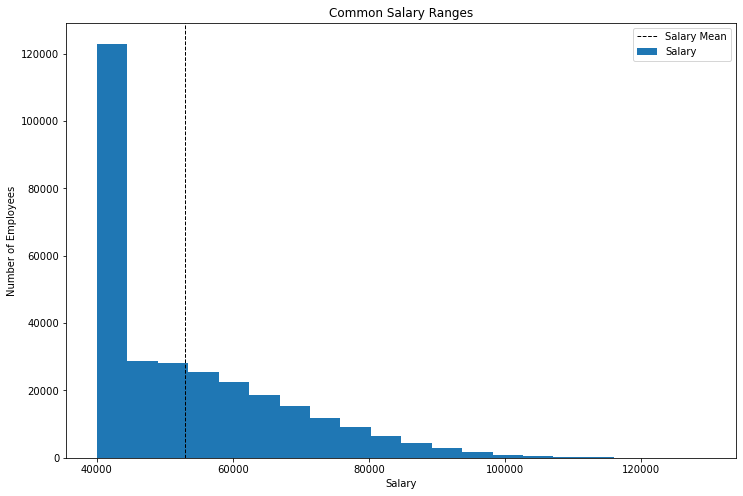

In [2]:
# BONUS 1: Histogram to visualize the most common salary ranges for employees

# Read salary data
salary_data = pd.read_sql("select * from salaries", connection)
salary_data

plt.figure(figsize=(12,8))
plt.hist(salary_data['salary'], 20, density=False, label="Salary")
plt.axvline(salary_data['salary'].mean(), color='k', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

In [3]:
# BONUS 2: Bar chart of average salary by title

# Query for salary and title details
query_df = pd.read_sql_query("\
select * from salaries s \
inner join employees e on e.emp_no = s.emp_no \
inner join titles t on t.title_id = e.emp_title_id",connection)

In [4]:
# Average salary by title using groupby and mean
avg_salary_by_title = query_df.groupby(["title"]).mean()["salary"]
avg_salary_by_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

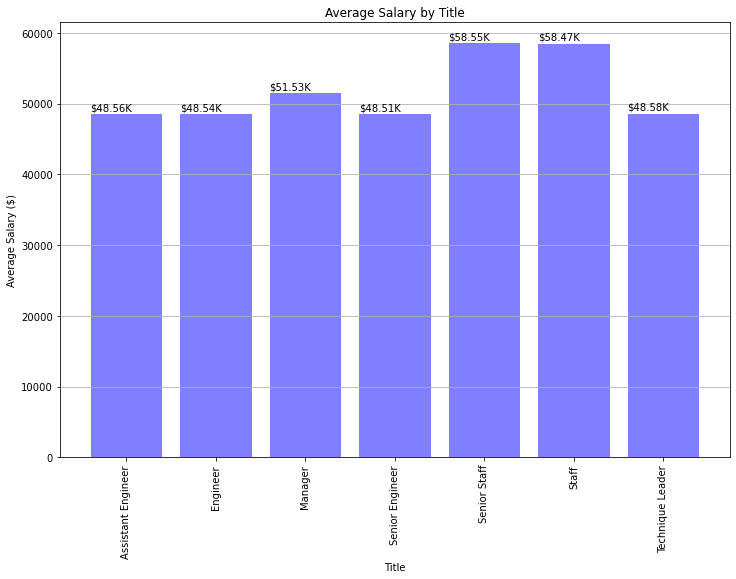

In [5]:
# Plot the Barchart
plt.figure(figsize=(12,8))
title_list = avg_salary_by_title.index
avg_salary_for_title = avg_salary_by_title.values

x_axis = np.arange(len(title_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=90)
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")
chart = plt.bar(x_axis, avg_salary_for_title, color="b", alpha=0.5, align="center")

for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
    
plt.savefig("Average Salary by Title.png")

In [6]:
# Epilogue - Search your ID number 499942
emp_499942 = pd.read_sql("select * from employees where emp_no = 499942", connection)
emp_499942

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


## Observation

# Very Funny! April Foolsday